# <b><font color="#2cb8b2"> QuantiCore S.A - Estad√≠sticas de Educaci√≥n en Colombia (2011-2023) </font></b>

## <b><font color="#3ddb8f"> An√°lisis exploratorio y Visualizaciones de Datos </font></b>

_______________________________________________________________

### <b><font color="#3ddb8f"> Enfoque del an√°lisis: Deserci√≥n escolar</font></b>

## üìå Objetivo general
Analizar los factores que influyen en la deserci√≥n escolar en Colombia, con √©nfasis en sus diferentes niveles (transici√≥n, primaria, secundaria y media), utilizando datos agregados por municipio, a√±o y departamento.

_______________________________________________________________

### <b><font color="#a9f04d"> Importar librer√≠as </font></b>

In [6]:
# Importamos las librerias principales
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import folium
from folium.features import GeoJsonTooltip
%matplotlib inline

### <b><font color="#a9f04d"> Importar el Dataset </font></b>

In [7]:
df_data = pd.read_csv("../data/dataset_nuevo.csv")

### <b><font color="#268fbe"> 1. An√°lisis exploratorio de los indicadores </font></b>

Enfoque del an√°lisis: Deserci√≥n escolar
üìå Objetivo general
Analizar los factores que influyen en la deserci√≥n escolar en Colombia, con √©nfasis en sus diferentes niveles (transici√≥n, primaria, secundaria y media), utilizando datos agregados por municipio, a√±o y departamento.

#### <b><font color="#551bb3"> 1.1.1 An√°lisis Descriptivo</font></b>

In [8]:
df_data.describe().T

count          mean            std  \
A√ëO                          14585.0   2016.999383       3.741392   
C√ìDIGO_MUNICIPIO             14585.0  38693.103668   26554.514246   
C√ìDIGO_DEPARTAMENTO          14585.0     38.259376      26.567883   
C√ìDIGO_ETC                   14585.0   3540.942818    1126.820167   
POBLACI√ìN_5_16               14585.0  12950.168324  145575.392605   
TASA_MATRICULACI√ìN_5_16      14585.0     84.945598      18.678155   
COBERTURA_NETA               14585.0     85.499540      17.032674   
COBERTURA_NETA_TRANSICI√ìN    14585.0     57.715734      16.197464   
COBERTURA_NETA_PRIMARIA      14585.0     82.606272      17.223897   
COBERTURA_NETA_SECUNDARIA    14585.0     69.880112      18.924568   
COBERTURA_NETA_MEDIA         14585.0     40.707483      15.639833   
COBERTURA_BRUTA              14585.0     99.703575     148.348764   
COBERTURA_BRUTA_TRANSICI√ìN   14585.0     87.361172      25.811436   
COBERTURA_BRUTA_PRIMARIA     14585.0    107.479021     154.462435   
COBERTURA_BRUTA_SECUNDARIA   14585.0    103.371534     158.099033   
COBERTURA_BRUTA_MEDIA        14585.0     75.820322      27.425895   
SEDES_CONECTADAS_A_INTERNET  14585.0     34.492877      27.885646   
DESERCI√ìN                    14585.0      3.503383       2.186033   
DESERCI√ìN_TRANSICI√ìN         14585.0      3.425499       2.859810   
DESERCI√ìN_PRIMARIA           14585.0      2.756575       2.093087   
DESERCI√ìN_SECUNDARIA         14585.0      4.592872       3.193685   
DESERCI√ìN_MEDIA              14585.0      3.420517       3.392306   
APROBACI√ìN                   14585.0     91.608060       5.323228   
APROBACI√ìN_TRANSICI√ìN        14585.0      0.493433       1.654658   
APROBACI√ìN_PRIMARIA          14585.0     93.213406       5.211607   
APROBACI√ìN_SECUNDARIA        14585.0     88.353011       7.965416   
APROBACI√ìN_MEDIA             14585.0     92.131718       7.015591   
REPROBACI√ìN                  14585.0      4.770230       3.996227   
REPROBACI√ìN_PRIMARIA         14585.0      3.919955       3.836593   
REPROBACI√ìN_SECUNDARIA       14585.0      6.860909       6.192164   
REPROBACI√ìN_MEDIA            14585.0      4.186407       4.266963   
REPITENCIA                   14585.0      3.307829       3.355427   
REPITENCIA_TRANSICI√ìN        14585.0      0.962896       2.418343   
REPITENCIA_PRIMARIA          14585.0      3.187538       3.639007   
REPITENCIA_SECUNDARIA        14585.0      4.353199       4.546369   
REPITENCIA_MEDIA             14585.0      1.706006       2.284119   

                                     min           25%           50%  \
A√ëO                          2011.000000   2014.000000   2017.000000   
C√ìDIGO_MUNICIPIO                0.000000  15676.000000  25839.000000   
C√ìDIGO_DEPARTAMENTO             0.000000     15.000000     25.000000   
C√ìDIGO_ETC                      0.000000   3769.000000   3785.000000   
POBLACI√ìN_5_16                  0.000000   1477.000000   3078.000000   
TASA_MATRICULACI√ìN_5_16         0.000000     74.850000     85.340000   
COBERTURA_NETA                  0.000000     76.850000     86.330000   
COBERTURA_NETA_TRANSICI√ìN       0.000000     47.560000     57.900000   
COBERTURA_NETA_PRIMARIA         0.000000     73.280000     82.820000   
COBERTURA_NETA_SECUNDARIA       0.000000     60.360000     70.830000   
COBERTURA_NETA_MEDIA           -4.969916     31.110000     41.090000   
COBERTURA_BRUTA                 0.000000     85.700000     97.580000   
COBERTURA_BRUTA_TRANSICI√ìN      0.000000     71.520000     85.330000   
COBERTURA_BRUTA_PRIMARIA        0.000000     89.910000    103.480000   
COBERTURA_BRUTA_SECUNDARIA     -5.903839     86.510000    101.600000   
COBERTURA_BRUTA_MEDIA         -27.183603     59.500000     75.200000   
SEDES_CONECTADAS_A_INTERNET -1269.307095     20.000000     33.113126   
DESERCI√ìN                      -1.047038      1.940000      3.140000   
DESERCI√ìN_TRANSICI√ìN          -12.472328      1.434043      2.910000   
D

In [9]:
#An√°lisis de las columnas relacionadas con la deserci√≥n

desercion_cols = ["DESERCI√ìN", "DESERCI√ìN_TRANSICI√ìN","DESERCI√ìN_PRIMARIA", "DESERCI√ìN_SECUNDARIA","DESERCI√ìN_MEDIA"]

for col in desercion_cols:
    print(f"{col}")
    print(f"Media: {df_data[col].mean():.3f}")
    print(f"Mediana: {df_data[col].median():.3f}")
    print(f"Desviaci√≥n est√°ndar: {df_data[col].std():.3f}")
    print(f"M√°ximo: {df_data[col].max():.3f}")
    print(f"M√≠nimo: {df_data[col].min():.3f}")
    print(f"Valores nulos: {df_data[col].isnull().sum()} de {len(df_data)} registros\n")


DESERCI√ìN
Media: 3.503
Mediana: 3.140
Desviaci√≥n est√°ndar: 2.186
M√°ximo: 27.900
M√≠nimo: -1.047
Valores nulos: 0 de 14585 registros

DESERCI√ìN_TRANSICI√ìN
Media: 3.425
Mediana: 2.910
Desviaci√≥n est√°ndar: 2.860
M√°ximo: 42.860
M√≠nimo: -12.472
Valores nulos: 0 de 14585 registros

DESERCI√ìN_PRIMARIA
Media: 2.757
Mediana: 2.320
Desviaci√≥n est√°ndar: 2.093
M√°ximo: 21.264
M√≠nimo: -4.869
Valores nulos: 0 de 14585 registros

DESERCI√ìN_SECUNDARIA
Media: 4.593
Mediana: 4.040
Desviaci√≥n est√°ndar: 3.194
M√°ximo: 47.140
M√≠nimo: -12.022
Valores nulos: 0 de 14585 registros

DESERCI√ìN_MEDIA
Media: 3.421
Mediana: 2.780
Desviaci√≥n est√°ndar: 3.392
M√°ximo: 62.500
M√≠nimo: -12.663
Valores nulos: 0 de 14585 registros



### <b><font color="#268fbe"> 2. Visualizaci√≥n de datos </font></b>

<Axes: title={'center': 'Valores unicos por feature'}>

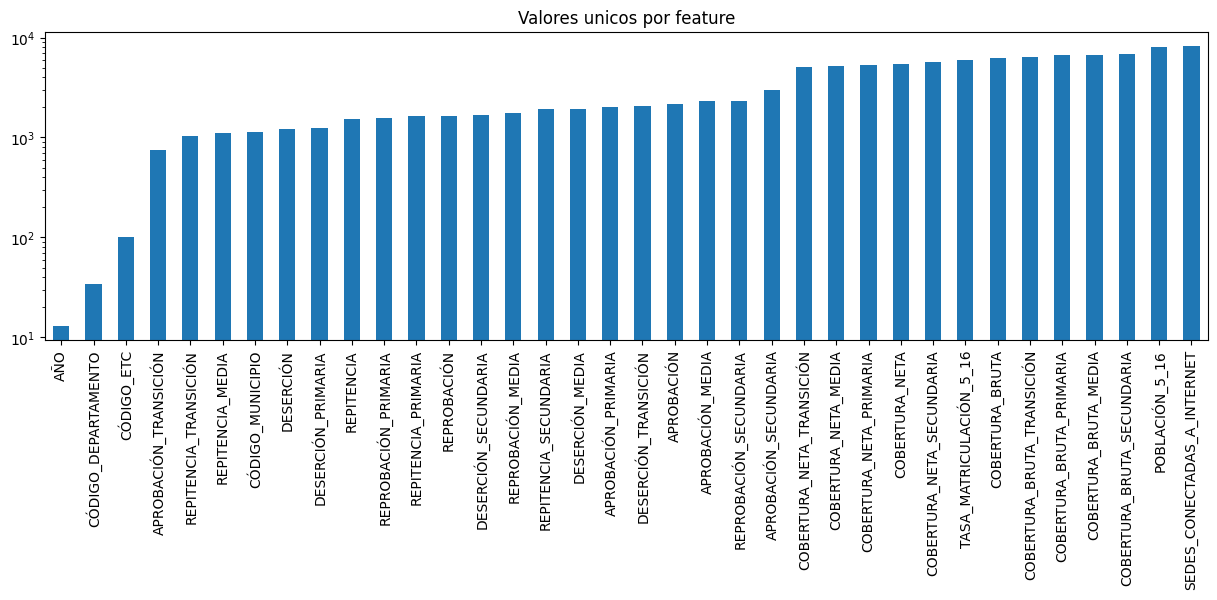

In [10]:
# Para cada caracter√≠stica num√©rica, calcula el n√∫mero de entradas √∫nicas
valores_unicos = df_data.select_dtypes(include="number").nunique().sort_values()

# Informaci√≥n gr√°fica con eje y en escala logar√≠tmica
valores_unicos.plot.bar(logy=True, figsize=(15, 4), title="Valores unicos por feature")


<b>Interpretaci√≥n</b>

Esta gr√°fica muestra el n√∫mero de valores √∫nicos por cada variable, en un conjunto de datos relacionados con educaci√≥n en Colombia. El eje Y est√° en escala logar√≠tmica, lo cual indica que hay gran variabilidad entre las columnas en cuanto a su cardinalidad (n√∫mero de valores √∫nicos).

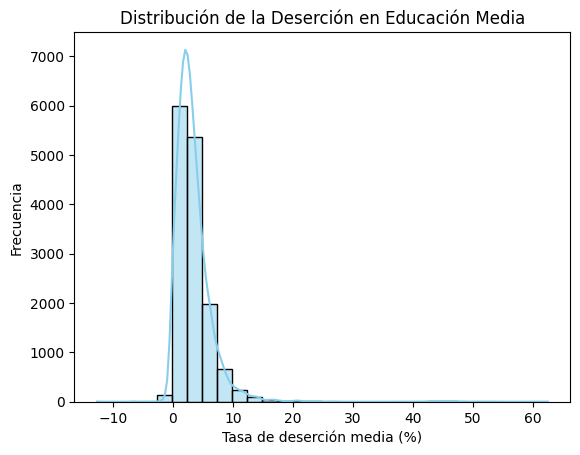

In [11]:
sns.histplot(df_data['DESERCI√ìN_MEDIA'], kde=True, bins=30, color='skyblue')
plt.title('Distribuci√≥n de la Deserci√≥n en Educaci√≥n Media')
plt.xlabel('Tasa de deserci√≥n media (%)')
plt.ylabel('Frecuencia')
plt.show()

<b>Interpretaci√≥n</b>

* Concentraci√≥n de Datos: La gran mayor√≠a de las tasas de deserci√≥n se concentran en valores muy bajos, espec√≠ficamente entre 0% y aproximadamente 5%. La barra m√°s alta del histograma se encuentra en este rango.

* La deserci√≥n en educaci√≥n media es un problema que, en la mayor√≠a de los casos, se mantiene en niveles bajos (por debajo del 5%). Sin embargo, la presencia de una cola larga y valores extremos (aunque con baja frecuencia) indica que hay casos cr√≠ticos con tasas de deserci√≥n excepcionalmente altas. Estos casos, aunque menos frecuentes, son importantes y probablemente requieren una atenci√≥n espec√≠fica.

#### <b><font color="#551bb3"> 2.3 Evoluci√≥n de la deserci√≥n escolar por a√±o y nivel educativo</font></b>

In [12]:

tab_contents = {}
custom_colors = ["#551bb3", "#268fbe", "#2cb8b2", "#3ddb8f", "#a9f04d"]
for col in desercion_cols:
    df_agrupado = df_data.groupby('A√ëO')[col].mean().reset_index()
    fig = px.line(
        df_agrupado,
        x='A√ëO',
        y=col,
        markers=True,
        title=f'Evoluci√≥n de la deserci√≥n ({col.replace("_", " ").title()}) por a√±o',
        labels={col: 'Tasa promedio de deserci√≥n', 'A√ëO': 'A√±o'},
        color_discrete_sequence=[custom_colors[desercion_cols.index(col) % len(custom_colors)]]
    )
    fig.update_layout(yaxis_title='Tasa promedio de deserci√≥n', xaxis_title='A√±o')
    tab_contents[col] = fig

tab = widgets.Tab()
tab.children = [widgets.Output() for _ in tab_contents]
for i, title in enumerate(tab_contents.keys()):
    tab.set_title(i, title)

for i, (title, fig) in enumerate(tab_contents.items()):
    with tab.children[i]:
        fig.show()

display(tab)

<b>Interpretaci√≥n</b>

Se observa una tendencia com√∫n en todos los niveles, con descensos alrededor de 2019-2020 seguidos de aumentos en 2021 y 2022.  Esto podr√≠a indicar un factor externo o evento que impact√≥ la deserci√≥n en esos a√±os, posiblemente relacionado con la pandemia de COVID-19 y sus efectos en la educaci√≥n.
Nivel de deserci√≥n: La deserci√≥n secundaria tiende a ser la m√°s alta, mientras que la primaria es la m√°s baja entre los niveles presentados.
A partir de 2020, se evidencia un incremento en las tasas de deserci√≥n en casi todos los niveles, lo que sugiere un posible desaf√≠o en la retenci√≥n estudiantil en los a√±os m√°s recientes. 

 #### <b><font color="#551bb3"> 2.4 Top 30 municipios con mayor deserci√≥n escolar por a√±o</font></b>

In [14]:
fecha = sorted(df_data["A√ëO"].unique())

tab_contents = {}

for fecha in fecha:
    df_filtrado = df_data[df_data["A√ëO"] == fecha]
    top_desercion = df_filtrado.nlargest(30, "DESERCI√ìN")
    fig = px.bar(
        top_desercion,
        x="DESERCI√ìN",
        y="MUNICIPIO",
        orientation="h",
        color="DESERCI√ìN",
        color_continuous_scale=custom_colors,
        title=f"Top 30 municipios con mayor deserci√≥n ({fecha})",
        labels={"DESERCI√ìN": "Tasa de deserci√≥n (%)", "MUNICIPIO": "Municipio"},
        animation_frame="A√ëO",
        height=600,
    )
    fig.update_layout(
        yaxis={'categoryorder':'total ascending'},
        title_font=dict(size=18, color=custom_colors[0]),
        xaxis_title_font=dict(size=14),
        yaxis_title_font=dict(size=14),
        plot_bgcolor="#f9f9f9",
        paper_bgcolor="#f9f9f9",
    )
    tab_contents[str(fecha)] = fig

tab = widgets.Tab()
tab.children = [widgets.Output() for _ in tab_contents]
for i, title in enumerate(tab_contents.keys()):
    tab.set_title(i, title)

for i, (title, fig) in enumerate(tab_contents.items()):
    with tab.children[i]:
        fig.show()

display(tab)

<b>Interpretaci√≥n</b>

Muchos municipios en el top 30 comparten caracter√≠sticas comunes:
* Ubicaci√≥n rural y dispersa.
* Alta presencia de poblaci√≥n √©tnica (ind√≠gena y afrodescendiente).
* Historial de conflicto armado o presencia de econom√≠as il√≠citas.
* Limitado acceso a infraestructura y conectividad.

Esto refuerza la necesidad de medidas contextualizadas y diferenciales en zonas apartadas del pa√≠s, m√°s all√° de intervenciones generales.

 #### <b><font color="#551bb3"> 2.5 Tasa de deserci√≥n escolar por niveles educativos (Transici√≥n, Primaria, Secundaria y Media) por a√±o</font></b>

In [15]:
niveles = [
    "DESERCI√ìN_TRANSICI√ìN",
    "DESERCI√ìN_PRIMARIA",
    "DESERCI√ìN_SECUNDARIA",
    "DESERCI√ìN_MEDIA"
]


date = sorted(df_data["A√ëO"].unique())

tab_contents = {}

for date in date:
    df_date = df_data[df_data["A√ëO"] == date]
    medias = [df_date[nivel].mean() for nivel in niveles]
    fig = go.Figure(
        data=[
            go.Bar(
                x=niveles,
                y=medias,
                marker_color=custom_colors,
                text=[f"{v:.2f}%" for v in medias],
                textposition="auto"
            )
        ]
    )
    fig.update_layout(
        title=f"Tasa de deserci√≥n escolar promedio por nivel educativo ({date})",
        xaxis_title="Nivel educativo",
        yaxis_title="Tasa promedio de deserci√≥n (%)",
        xaxis_tickangle=20,
        plot_bgcolor="#f9f9f9",
        paper_bgcolor="#f9f9f9",
        font=dict(family="Arial", size=14),
        height=450
    )
    tab_contents[str(date)] = fig

tab = widgets.Tab()
tab.children = [widgets.Output() for _ in tab_contents]
for i, title in enumerate(tab_contents.keys()):
    tab.set_title(i, title)

for i, (title, fig) in enumerate(tab_contents.items()):
    with tab.children[i]:
        fig.show()
display(tab)

<b>Interpretaci√≥n</b>

 Hallazgos importantes

* Mayor deserci√≥n en secundaria, sostenidamente por encima del 5% en varios a√±os.
* Primaria muestra una evoluci√≥n positiva, alcanzando su punto m√°s bajo en 2023.
* Transici√≥n y media muestran oscilaciones, pero con una tendencia general hacia la mejora.
* El impacto del a√±o 2021 (pospandemia) parece evidente, especialmente en secundaria y media.

 #### <b><font color="#551bb3"> 2.6 Cantidad de estudiantes estudiados de 5 a 16 a√±os de edad, segregado por Departamentos y Municipios </font></b>

In [16]:
departamentos = [
    "Atl√°ntico",
    "Antioquia",
    "Valle del Cauca",
    "Santander",
    "Cundinamarca",
    "Bol√≠var",
    "Caldas",
    "Cesar",
]

custom_colors = ["#551bb3", "#268fbe", "#2cb8b2", "#3ddb8f", "#a9f04d"]

tab_contents = {}

for depto in departamentos:
    pivot = df_data[df_data["DEPARTAMENTO"] == depto].pivot(
        index="MUNICIPIO", columns="A√ëO", values="POBLACI√ìN_5_16"
    )
    fig = px.imshow(
        pivot,
        color_continuous_scale=custom_colors,
        labels=dict(x="A√±o", y="Municipio", color="Poblaci√≥n(5-16 a√±os)"),
    )
    fig.update_layout(
        title=f"Cantidad de estudiantes por municipio - {depto}",
        width=1000,
        height=800,
    )
    tab_contents[depto] = fig

tab = widgets.Tab()
tab.children = [widgets.Output() for _ in tab_contents]
for i, title in enumerate(tab_contents.keys()):
    tab.set_title(i, title)

for i, (title, fig) in enumerate(tab_contents.items()):
    with tab.children[i]:
        fig.show()

display(tab)


<b>Interpretaci√≥n</b>

Entre los departamentos que concentran mayor poblaci√≥n estudiantil se encuentran Atl√°ntico, Antioquia, Bolivar, Valle del Cauca y Caldas, con un promedio  entre los 150k a 300k, las mayores variaciones se dieron entre 2018 y 2020, se presume que fue a causa de la pandemia.
Algunos departamentos pueden tener una poblaci√≥n mucho menor, lo cual puede reflejar dispersi√≥n geogr√°fica o baja densidad poblacional.
Pandemia y brecha tecnol√≥gica (falta de internet y dispositivos) afectaron continuidad acad√©mica especialmente en zonas .

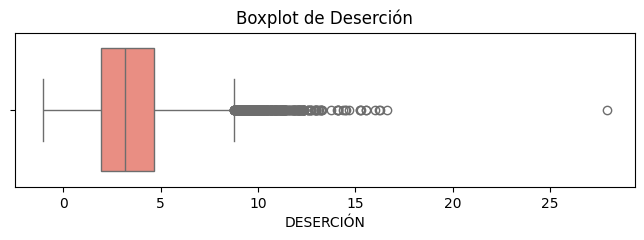

In [17]:
# Boxplot para detectar outliers
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_data['DESERCI√ìN'], color='salmon')
plt.title('Boxplot de Deserci√≥n')
plt.show()

<b>Interpretaci√≥n</b>

* Forma de la distribuci√≥n:
La mayor√≠a de los municipios tienen tasas de deserci√≥n media bajas, pero hay unos pocos donde la deserci√≥n es mucho m√°s alta que lo normal. Por eso, el gr√°fico se ve "cargado" hacia la izquierda y con una cola m√°s larga hacia la derecha.

* Valores m√°s comunes:
En la mitad de los municipios, las tasas de deserci√≥n media est√°n entre 1% y 4 o 5%. Es decir, esos son los valores m√°s frecuentes en el pa√≠s.

* Casos extremos (outliers):
Hay varios municipios donde la deserci√≥n llega a ser muy alta, incluso pasando del 9% hasta casi el 28%. Estos casos son at√≠picos y llaman la atenci√≥n, ya que podr√≠an reflejar problemas graves o particulares que no ocurren en la mayor√≠a del pa√≠s. Ser√≠a importante investigar qu√© ocurre en esos lugares.

 ### <b><font color="#268fbe"> 3. An√°lisis de correlaci√≥n de variables</font></b>

 #### <b><font color="#551bb3"> 3.1 Matriz de correlaci√≥n</font></b>

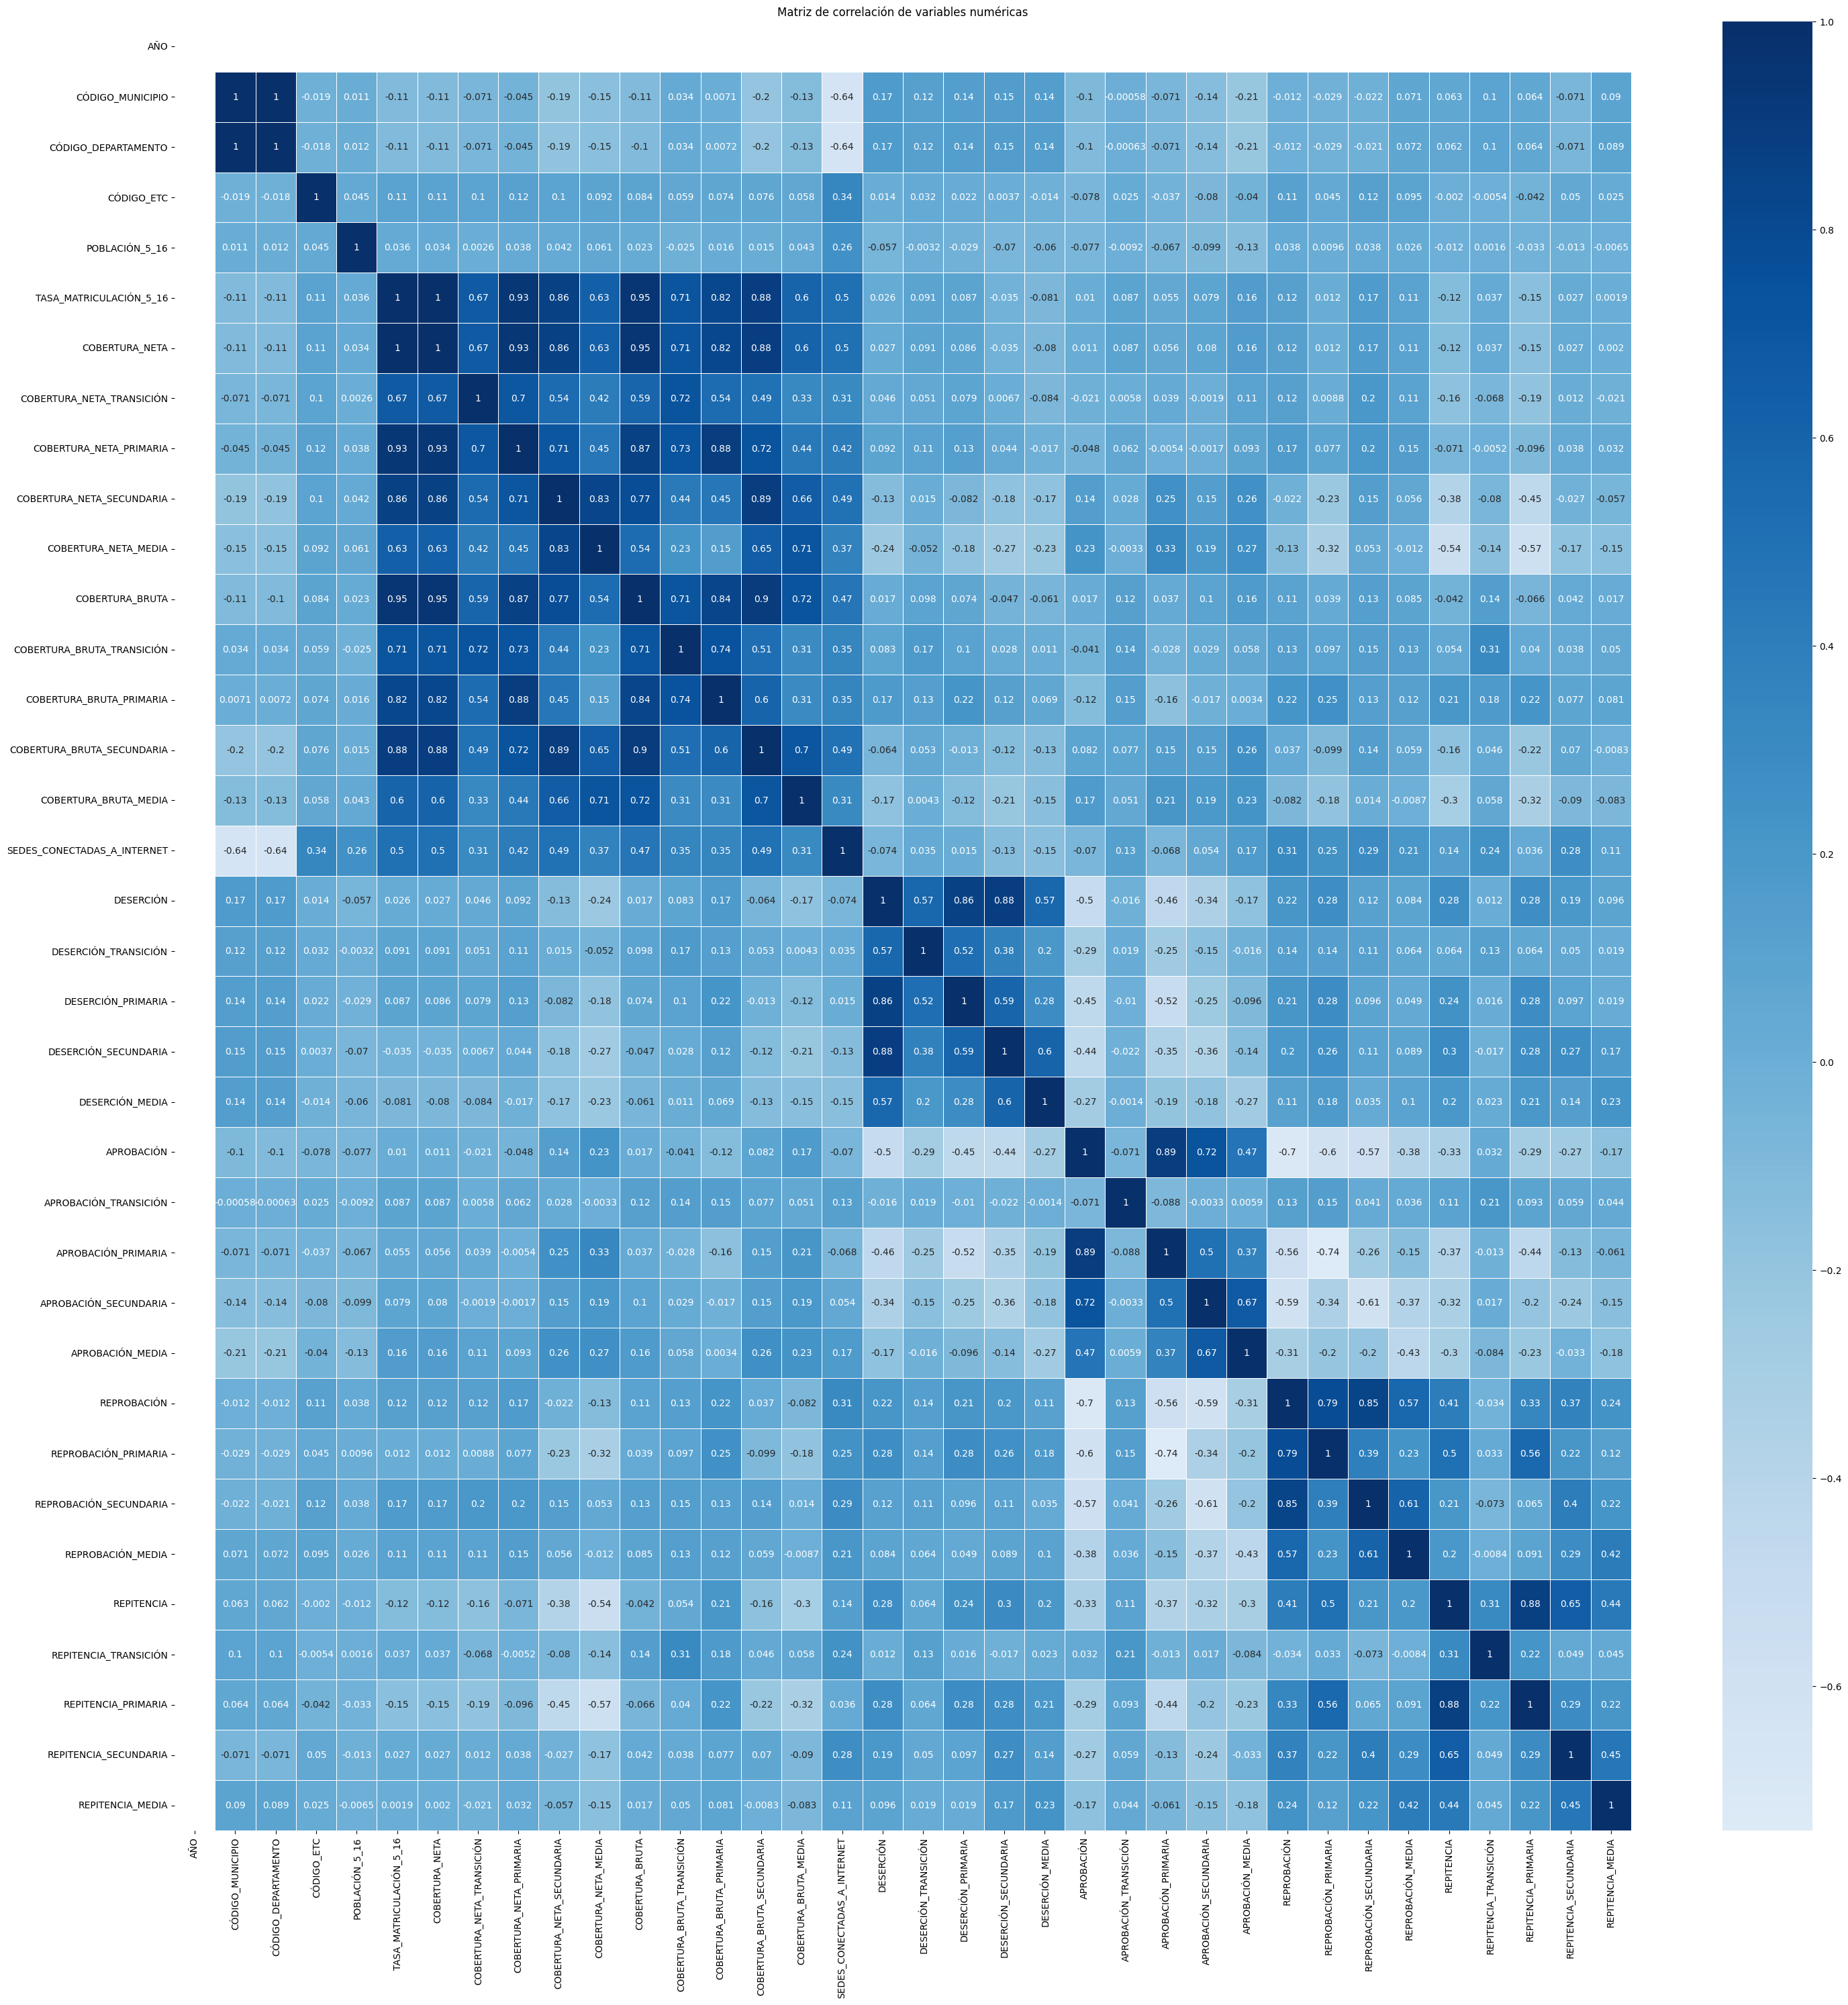

In [18]:
plt.figure(figsize=(35, 35))
corr = df_filtrado.corr(numeric_only=True)
sns.heatmap(corr, annot=True,linewidths=.5, cmap = 'Blues' , center=0)
plt.title("Matriz de correlaci√≥n de variables num√©ricas")
plt.show()


<b>Interpretaci√≥n</b>

1- Factores acad√©micos est√°n altamente relacionados con la deserci√≥n en media.
* Reprobaci√≥n y repitencia est√°n fuertemente ligados al abandono escolar.
* Una buena tasa de aprobaci√≥n reduce notablemente la deserci√≥n.

2- La dimensi√≥n m√°s cr√≠tica es la del nivel ‚Äúmedia‚Äù (secundaria superior).

Los valores espec√≠ficos para media (APROBACI√ìN_MEDIA, REPROBACI√ìN_MEDIA, REPITENCIA_MEDIA) tienen mayor peso que los agregados generales.

 #### <b><font color="#551bb3"> 3.1 Matriz de correlaci√≥n de indicadores en educaci√≥n de nivel secundario </font></b>

DESERCI√ìN  REPROBACI√ìN  REPITENCIA  \
DESERCI√ìN              1.000000     0.153783    0.085427   
REPROBACI√ìN            0.153783     1.000000    0.313449   
REPITENCIA             0.085427     0.313449    1.000000   
COBERTURA_NETA_MEDIA  -0.206696    -0.005438   -0.014664   
DESERCI√ìN_MEDIA        0.619149     0.094954    0.076178   
REPROBACI√ìN_MEDIA      0.092146     0.724282    0.192998   
REPITENCIA_MEDIA       0.061023     0.241923    0.700521   
APROBACI√ìN_MEDIA      -0.362712    -0.493567   -0.199408   

                      COBERTURA_NETA_MEDIA  DESERCI√ìN_MEDIA  \
DESERCI√ìN                        -0.206696         0.619149   
REPROBACI√ìN                      -0.005438         0.094954   
REPITENCIA                       -0.014664         0.076178   
COBERTURA_NETA_MEDIA              1.000000        -0.143502   
DESERCI√ìN_MEDIA                  -0.143502         1.000000   
REPROBACI√ìN_MEDIA                 0.072726         0.076390   
REPITENCIA_MEDIA                  0.051842         0.107906   
APROBACI√ìN_MEDIA                  0.099875        -0.524148   

                      REPROBACI√ìN_MEDIA  REPITENCIA_MEDIA  APROBACI√ìN_MEDIA  
DESERCI√ìN                      0.092146          0.061023         -0.362712  
REPROBACI√ìN                    0.724282          0.241923         -0.493567  
REPITENCIA                     0.192998          0.700521         -0.199408  
COBERTURA_NETA_MEDIA           0.072726          0.051842          0.099875  
DESERCI√ìN_MEDIA                0.076390          0.107906         -0.524148  
REPROBACI√ìN_MEDIA              1.000000          0.235083         -0.628321  
REPITENCIA_MEDIA               0.235083          1.000000         -0.170099  
APROBACI√ìN_MEDIA              -0.628321         -0.170099          1.000000

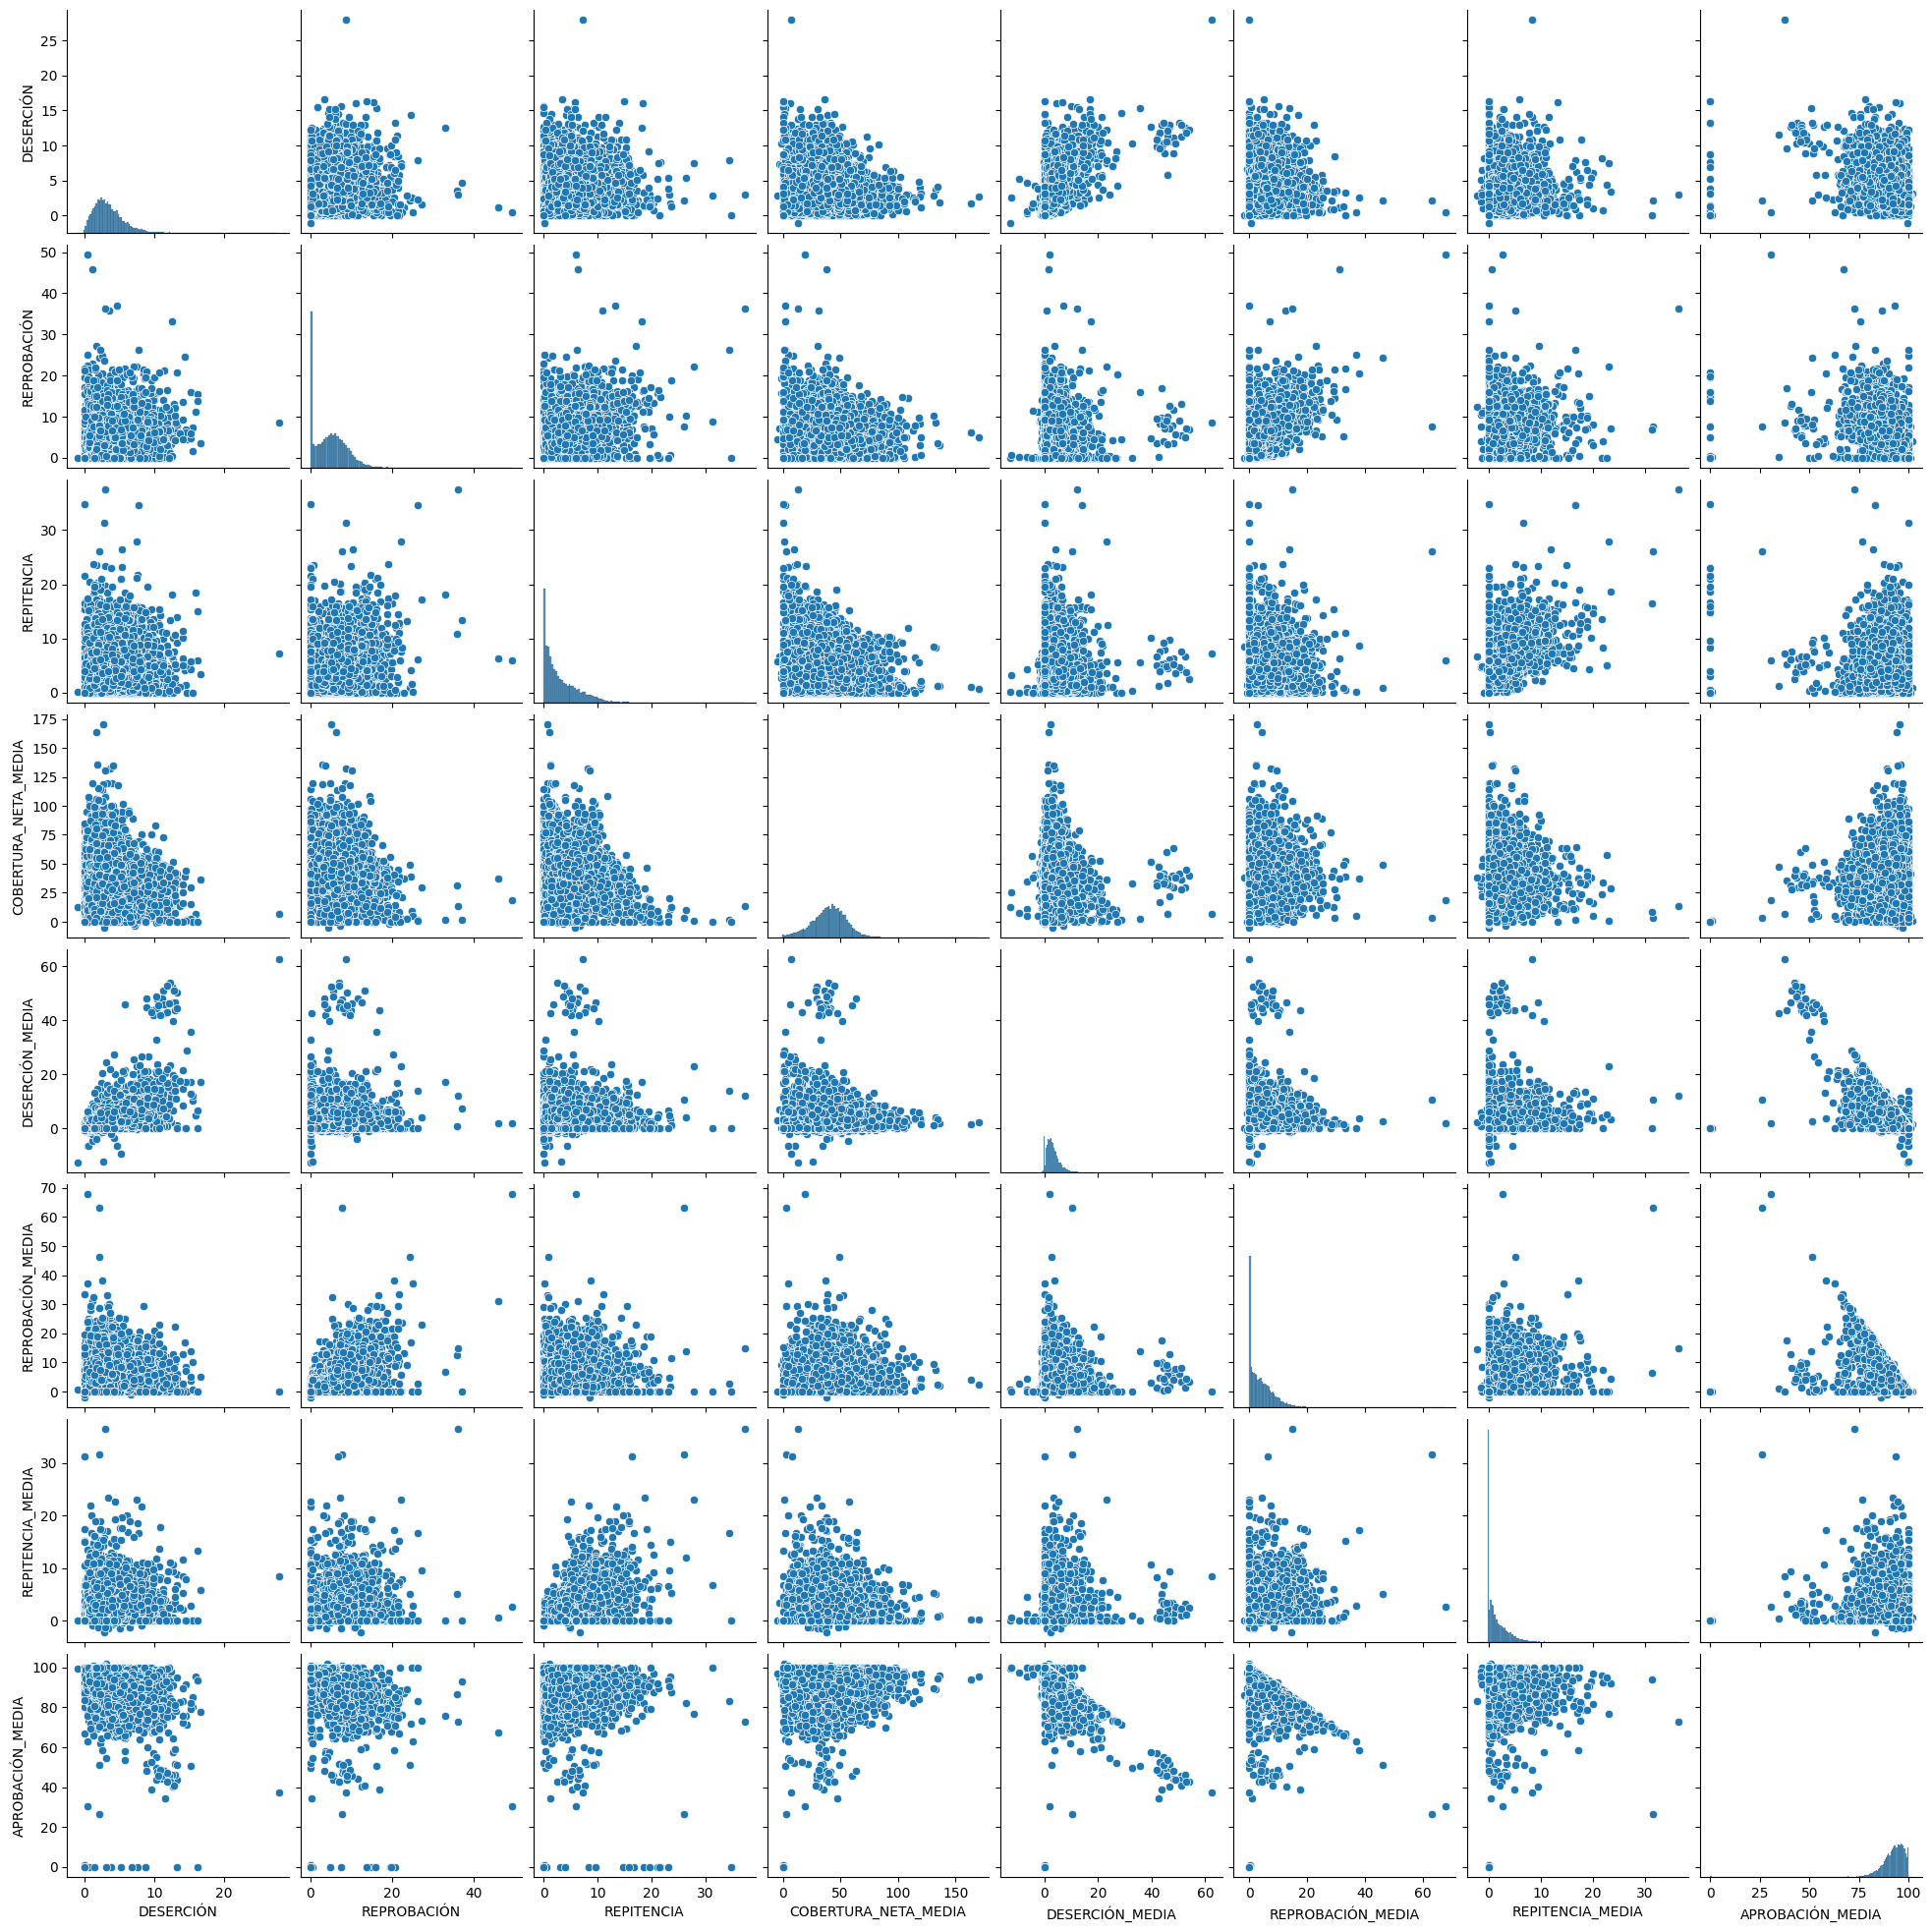

In [19]:
corr_df = df_data[['DESERCI√ìN', 'REPROBACI√ìN', 'REPITENCIA', 'COBERTURA_NETA_MEDIA',
                               'DESERCI√ìN_MEDIA', 'REPROBACI√ìN_MEDIA', 'REPITENCIA_MEDIA','APROBACI√ìN_MEDIA',
                               ]]

sns.pairplot(corr_df)

corr_df.corr()

<b>Interpretaci√≥n</b>

La gr√°fica refuerza la evidencia previa: las variables m√°s fuertemente asociadas con DESERCI√ìN_MEDIA son las que miden rendimiento acad√©mico en el nivel media.

La dispersi√≥n de los datos indica que hay varios factores combinados, pero se mantiene una l√≠nea clara:
A mayor reprobaci√≥n o repitencia ‚Üí mayor deserci√≥n; a mayor aprobaci√≥n ‚Üí menor deserci√≥n.

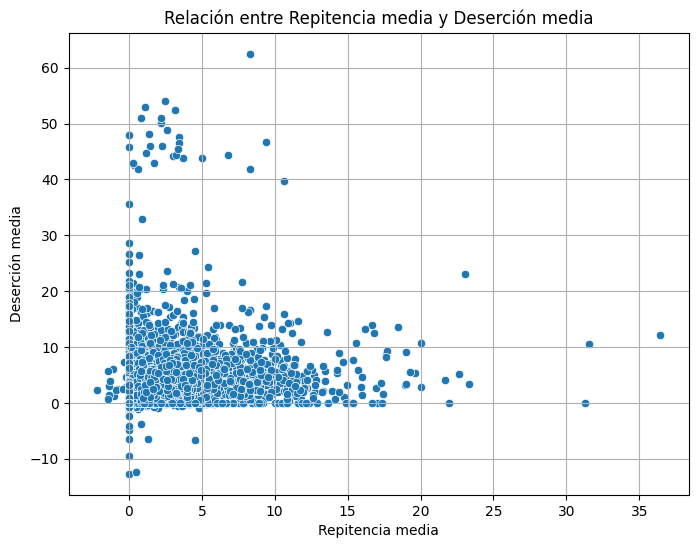

In [20]:
# 2. Repitencia media vs Deserci√≥n media
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_data, x='REPITENCIA_MEDIA', y='DESERCI√ìN_MEDIA')
plt.title('Relaci√≥n entre Repitencia media y Deserci√≥n media')
plt.xlabel('Repitencia media')
plt.ylabel('Deserci√≥n media')
plt.grid(True)
plt.savefig("repitencia_vs_desercion.png", dpi=300)
plt.show()


<b>Interpretaci√≥n</b>

La mayor√≠a de los puntos se concentran en la parte inferior izquierda del gr√°fico, lo que indica que, en general, la mayor√≠a de las observaciones tienen tasas bajas tanto de repitencia como de deserci√≥n (aproximadamente por debajo de 10% en ambos casos).

Existe una relaci√≥n positiva, aunque d√©bil y con alta variabilidad, entre la repitencia media y la deserci√≥n media. Es decir, las instituciones o cohortes con mayores tasas de repitencia tienden a tener mayores tasas de deserci√≥n, pero esta relaci√≥n no es consistente en todos los casos.

 ### <b><font color="#268fbe"> 4. Mapas con Geopandas</font></b>

 #### <b><font color="#551bb3"> 4.1 Desarrollo de GeoDataFrame </font></b>

In [21]:
#establecimientos = pd.read_csv("ESTABLECIMIENTOS_EDUCATIVOS.csv")
estadisticas = pd.read_csv("../data/ESTADISTICAS_EN_EDUCACION.csv")

In [22]:
municipios = gpd.read_file("../data/COL_Municipio.zip")

In [23]:
estadisticas.head()

A√ëO  C√ìDIGO_MUNICIPIO   MUNICIPIO  C√ìDIGO_DEPARTAMENTO DEPARTAMENTO  \
0  2023              5001    Medell√≠n                    5    Antioquia   
1  2023              5002   Abejorral                    5    Antioquia   
2  2023              5004    Abriaqu√≠                    5    Antioquia   
3  2023              5021  Alejandr√≠a                    5    Antioquia   
4  2023              5030       Amag√°                    5    Antioquia   

   C√ìDIGO_ETC              ETC POBLACI√ìN_5_16  TASA_MATRICULACI√ìN_5_16  \
0      3759.0         Medell√≠n         377562                    96.15   
1      3758.0  Antioquia (ETC)           3634                    74.38   
2      3758.0  Antioquia (ETC)            503                    62.62   
3      3758.0  Antioquia (ETC)            864                    81.37   
4      3758.0  Antioquia (ETC)           5060                    78.30   

   COBERTURA_NETA  ...  REPROBACI√ìN  REPROBACI√ìN_TRANSICI√ìN  \
0           95.94  ...         9.23                    0.15   
1           74.38  ...         7.77                    0.56   
2           62.62  ...         6.55                    0.00   
3           81.37  ...         7.88                    0.00   
4           78.30  ...        10.71                    0.00   

   REPROBACI√ìN_PRIMARIA  REPROBACI√ìN_SECUNDARIA  REPROBACI√ìN_MEDIA  \
0                  6.21                   15.40               7.27   
1                  7.26                   10.93               4.41   
2                  1.96                   16.51               2.04   
3                  7.02                   13.65               2.40   
4                  9.63                   16.48               5.50   

   REPITENCIA  REPITENCIA_TRANSICI√ìN  REPITENCIA_PRIMARIA  \
0        9.25                   1.82                 8.34   
1        9.07                   1.67                10.28   
2        9.52                   0.00                10.46   
3        7.20                   1.59                 7.69   
4       12.08                   0.29                11.54   

   REPITENCIA_SECUNDARIA  REPITENCIA_MEDIA  
0                  13.69              4.48  
1                  11.32              2.20  
2                  13.76              2.04  
3                  11.65              0.00  
4                  18.48              3.98  

[5 rows x 41 columns]

In [24]:
municipios["ID"] = pd.to_numeric(municipios["ID"])

In [25]:
# Unimos los DataFrames de estad√≠sticas y municipios
datos_merge = estadisticas.merge(municipios, left_on="C√ìDIGO_MUNICIPIO", right_on="ID")
datos_merge.head(5)

A√ëO  C√ìDIGO_MUNICIPIO   MUNICIPIO  C√ìDIGO_DEPARTAMENTO DEPARTAMENTO  \
0  2023              5001    Medell√≠n                    5    Antioquia   
1  2023              5002   Abejorral                    5    Antioquia   
2  2023              5004    Abriaqu√≠                    5    Antioquia   
3  2023              5021  Alejandr√≠a                    5    Antioquia   
4  2023              5030       Amag√°                    5    Antioquia   

   C√ìDIGO_ETC              ETC POBLACI√ìN_5_16  TASA_MATRICULACI√ìN_5_16  \
0      3759.0         Medell√≠n         377562                    96.15   
1      3758.0  Antioquia (ETC)           3634                    74.38   
2      3758.0  Antioquia (ETC)            503                    62.62   
3      3758.0  Antioquia (ETC)            864                    81.37   
4      3758.0  Antioquia (ETC)           5060                    78.30   

   COBERTURA_NETA  ...  REPITENCIA_TRANSICI√ìN  REPITENCIA_PRIMARIA  \
0           95.94  ...                   1.82                 8.34   
1           74.38  ...                   1.67                10.28   
2           62.62  ...                   0.00                10.46   
3           81.37  ...                   1.59                 7.69   
4           78.30  ...                   0.29                11.54   

   REPITENCIA_SECUNDARIA  REPITENCIA_MEDIA    ID  TOTPOP_CY    Shape__Are  \
0                  13.69              4.48  5001    2559097  3.798647e+08   
1                  11.32              2.20  5002      20493  5.155810e+08   
2                  13.76              2.04  5004       2763  2.935562e+08   
3                  11.65              0.00  5021       4746  1.294922e+08   
4                  18.48              3.98  5030      31600  8.456353e+07   

      Shape__Len  cod_dane                                           geometry  
0  107257.930213  05001000  POLYGON ((-8423087.868 710530.773, -8423036.11...  
1  128215.738906  05002000  POLYGON ((-8400992.107 663049.702, -8400902.90...  
2   88851.398989  05004000  POLYGON ((-8469712.412 753218.991, -8469679.34...  
3   75725.519153  05021000  POLYGON ((-8352494.01 715689.897, -8352304.867...  
4   50667.719094  05030000  POLYGON ((-8425665.892 679202.38, -8425597.038...  

[5 rows x 47 columns]

In [26]:
# Convertimos el DataFrame a GeoDataFrame
gdf = gpd.GeoDataFrame(datos_merge, geometry="geometry")

 #### <b><font color="#551bb3"> 4.2 Mapas </font></b>

<Axes: >

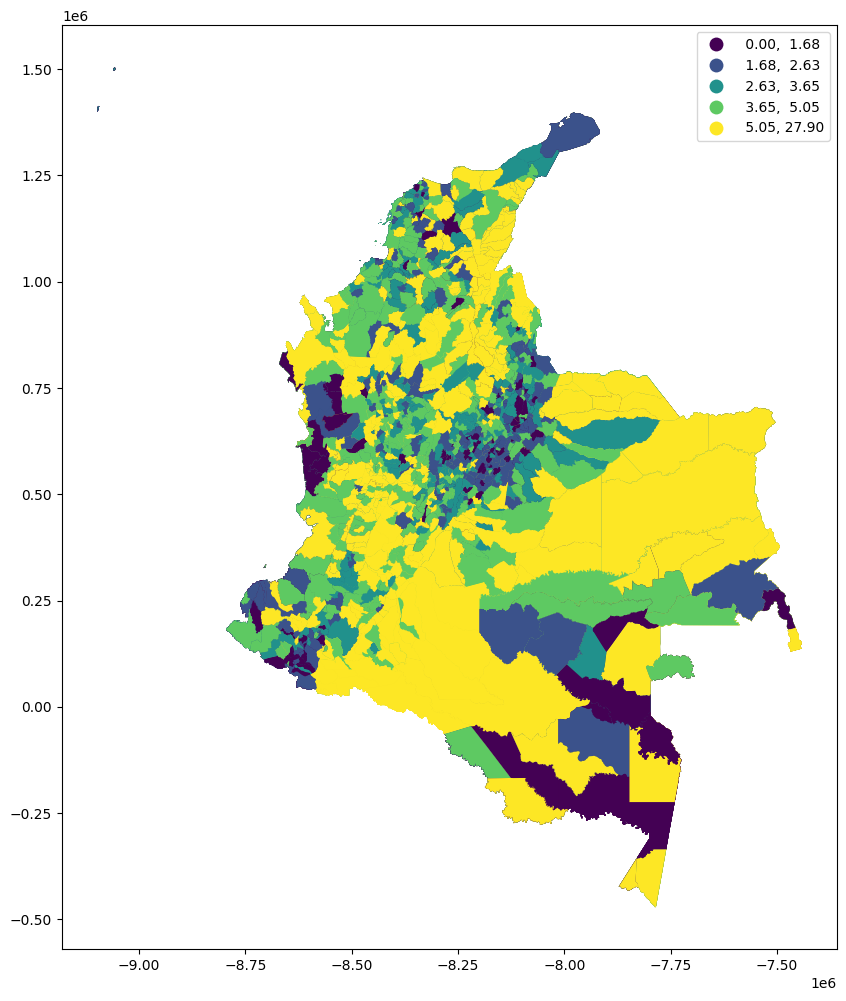

In [27]:
gdf.plot(figsize=(20, 12), column = "DESERCI√ìN", scheme="QUANTILEs", k= 5 ,legend=True)


In [28]:
import sys
print(sys.executable)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\python.exe
